# Обработка пропусков в данных, кодирование категориальных признаков, масштабирование данных.

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

## Загрузка и первичный анализ данных


In [13]:
# Будем использовать только обучающую выборку
data = pd.read_csv('walmart.csv', sep=",")

In [14]:
# размер набора данных
data.shape

(423325, 17)

In [15]:
# типы колонок
data.dtypes

Unnamed: 0        int64
Store             int64
Date             object
IsHoliday          bool
Dept            float64
Weekly_Sales    float64
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
Type             object
Size              int64
dtype: object

In [16]:
# проверим есть ли пропущенные значения
data.isnull().sum()

Unnamed: 0           0
Store                0
Date                 0
IsHoliday            0
Dept              1755
Weekly_Sales      1755
Temperature          0
Fuel_Price           0
MarkDown1       270892
MarkDown2       310793
MarkDown3       284667
MarkDown4       286859
MarkDown5       270138
CPI                585
Unemployment       585
Type                 0
Size                 0
dtype: int64

In [17]:
# Первые 5 строк датасета
data.head()

,Unnamed: 0,Store,Date,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,False,1.0,24924.50,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,2,1,2010-02-05,False,26.0,11737.12,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,3,1,2010-02-05,False,17.0,13223.76,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,4,1,2010-02-05,False,45.0,37.44,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,5,1,2010-02-05,False,28.0,1085.29,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315


In [18]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 423325


# Обработка пропусков в данных

## Простые стратегии - удаление или заполнение нулями


In [19]:
# Удаление колонок, содержащих пустые значения
data_new_1 = data.dropna(axis=1, how='any')
(data.shape, data_new_1.shape)

((423325, 17), (423325, 8))

Удаление колонок, содержащих пустые значения приведет к сокращению колонок с 17 до 8

In [20]:
# Удаление строк, содержащих пустые значения
data_new_2 = data.dropna(axis=0, how='any')
(data.shape, data_new_2.shape)

((423325, 17), (97056, 17))

Удаление строк, содержащих пустые значения приведет к сокращению строк с 423325 до 97056

In [21]:
data.head()

,Unnamed: 0,Store,Date,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,False,1.0,24924.50,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,2,1,2010-02-05,False,26.0,11737.12,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,3,1,2010-02-05,False,17.0,13223.76,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,4,1,2010-02-05,False,45.0,37.44,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,5,1,2010-02-05,False,28.0,1085.29,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315


In [22]:
# Заполнение всех пропущенных значений нулями
# В данном случае это некорректно, так как нулями заполняются в том числе категориальные колонки
data_new_3 = data.fillna(0)
data_new_3.head()

,Unnamed: 0,Store,Date,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,False,1.0,24924.50,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315
1,2,1,2010-02-05,False,26.0,11737.12,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315
2,3,1,2010-02-05,False,17.0,13223.76,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315
3,4,1,2010-02-05,False,45.0,37.44,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315
4,5,1,2010-02-05,False,28.0,1085.29,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315


## "Внедрение значений" - импьютация (imputation)

### Обработка пропусков в числовых данных

In [43]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка Dept. Тип данных float64. Количество пустых значений 1755, 0.41%.
Колонка Weekly_Sales. Тип данных float64. Количество пустых значений 1755, 0.41%.
Колонка MarkDown1. Тип данных float64. Количество пустых значений 270892, 63.99%.
Колонка MarkDown2. Тип данных float64. Количество пустых значений 310793, 73.42%.
Колонка MarkDown3. Тип данных float64. Количество пустых значений 284667, 67.25%.
Колонка MarkDown4. Тип данных float64. Количество пустых значений 286859, 67.76%.
Колонка MarkDown5. Тип данных float64. Количество пустых значений 270138, 63.81%.
Колонка CPI. Тип данных float64. Количество пустых значений 585, 0.14%.
Колонка Unemployment. Тип данных float64. Количество пустых значений 585, 0.14%.


- Колонки, содержащие менее 5% пропусков выбираем для построения модели.
- Колонки, содержащие более 30% пропусков не выбираем для построения модели.

In [24]:
# Фильтр по колонкам с пропущенными значениями
data_num = data[num_cols]
data_num

,Dept,Weekly_Sales,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1.0,24924.50,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,26.0,11737.12,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,17.0,13223.76,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,45.0,37.44,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,28.0,1085.29,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
...,...,...,...,...,...,...,...,...,...
423320,NaN,NaN,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN
423321,NaN,NaN,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN
423322,NaN,NaN,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN
423323,NaN,NaN,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN


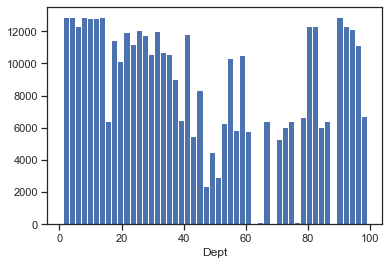

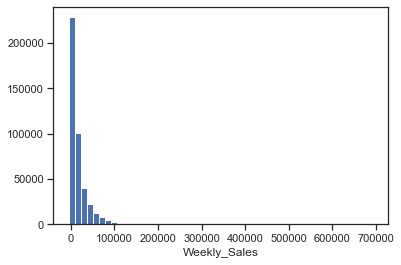

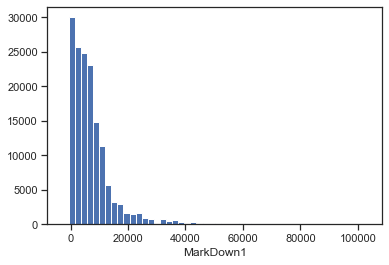

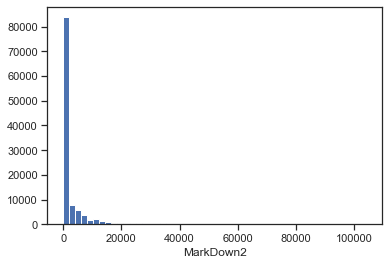

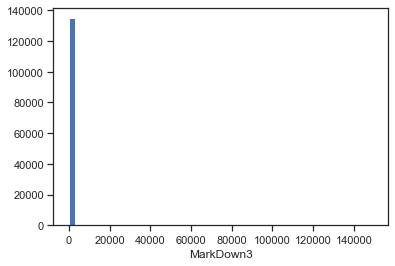

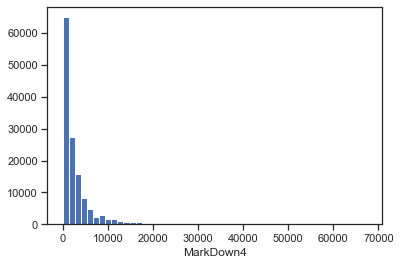

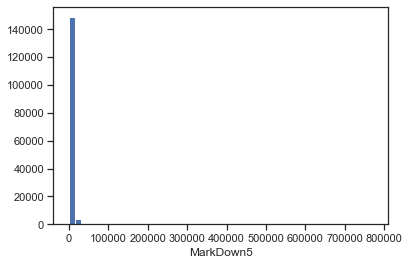

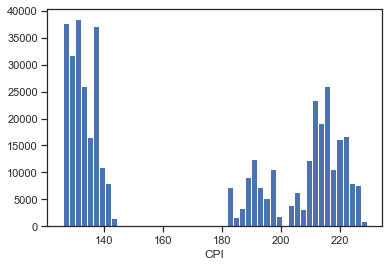

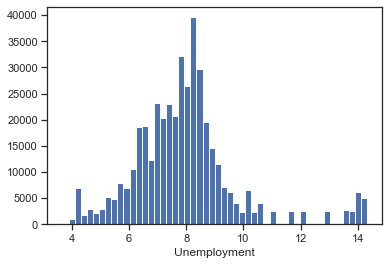

In [25]:
# Гистограмма по признакам
for col in data_num:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

In [29]:
data_num_Dept = data_num[['Dept']]
data_num_Dept.head()

,Dept
0,1.0
1,26.0
2,17.0
3,45.0
4,28.0


In [27]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [30]:
# Фильтр для проверки заполнения пустых значений
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_num_Dept)
mask_missing_values_only

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

Попробуем заполнить пропущенные значения в колонке Dept значениями, вычисленными по среднему арифметическому, медиане и моде.

In [31]:
strategies=['mean', 'median', 'most_frequent']

In [32]:
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_num_Dept)
    return data_num_imp[mask_missing_values_only]

In [33]:
strategies[0], test_num_impute(strategies[0])

('mean',
 array([44.26031739, 44.26031739, 44.26031739, ..., 44.26031739,
        44.26031739, 44.26031739]))

In [34]:
strategies[1], test_num_impute(strategies[1])

('median', array([37., 37., 37., ..., 37., 37., 37.]))

In [35]:
strategies[2], test_num_impute(strategies[2])

('most_frequent', array([1., 1., 1., ..., 1., 1., 1.]))

Таким образом более целесообразным является заполнение пропусков значениями, вычисленными по среднему арифметическому или по медиане.

In [36]:
# Более сложная функция, которая позволяет задавать колонку и вид импьютации
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    
    filled_data = data_num_imp[mask_missing_values_only]
    
    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

In [37]:
data[['Weekly_Sales']].describe()

,Weekly_Sales
count,421570.000000
mean,15981.258123
std,22711.183519
min,-4988.940000
25%,2079.650000
50%,7612.030000
75%,20205.852500
max,693099.360000


In [38]:
test_num_impute_col(data, 'Weekly_Sales', strategies[0])

('Weekly_Sales', 'mean', 1755, 15981.25812346704, 15981.25812346704)

In [39]:
test_num_impute_col(data, 'Weekly_Sales', strategies[1])

('Weekly_Sales', 'median', 1755, 7612.03, 7612.03)

In [40]:
test_num_impute_col(data, 'Weekly_Sales', strategies[2])

('Weekly_Sales', 'most_frequent', 1755, 10.0, 10.0)

Таким образом здесь также более целесообразным является заполнение пропусков значениями, вычисленными по среднему арифметическому или по медиане.

### Обработка пропусков в категориальных данных

In [55]:
# Будем использовать новый dataset
data = pd.read_csv('marvel-wikia-data.csv', sep=",")

In [46]:
# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка ID. Тип данных object. Количество пустых значений 3770, 0.89%.
Колонка ALIGN. Тип данных object. Количество пустых значений 2812, 0.66%.
Колонка EYE. Тип данных object. Количество пустых значений 9767, 2.31%.
Колонка HAIR. Тип данных object. Количество пустых значений 4264, 1.01%.
Колонка SEX. Тип данных object. Количество пустых значений 854, 0.2%.
Колонка GSM. Тип данных object. Количество пустых значений 16286, 3.85%.
Колонка ALIVE. Тип данных object. Количество пустых значений 3, 0.0%.
Колонка FIRST APPEARANCE. Тип данных object. Количество пустых значений 815, 0.19%.


- Колонки, содержащие менее 5% пропусков выбираем для построения модели.


In [47]:
cat_temp_data = data[['HAIR']]
cat_temp_data.head()

,HAIR
0,Brown Hair
1,White Hair
2,Black Hair
3,Black Hair
4,Blond Hair


In [48]:
cat_temp_data['HAIR'].unique()

array(['Brown Hair', 'White Hair', 'Black Hair', 'Blond Hair', 'No Hair',
       'Blue Hair', 'Red Hair', 'Bald', 'Auburn Hair', 'Grey Hair',
       'Silver Hair', 'Purple Hair', 'Strawberry Blond Hair',
       'Green Hair', 'Reddish Blond Hair', 'Gold Hair', nan,
       'Orange Hair', 'Pink Hair', 'Variable Hair', 'Yellow Hair',
       'Light Brown Hair', 'Magenta Hair', 'Bronze Hair', 'Dyed Hair',
       'Orange-brown Hair'], dtype=object)

In [49]:
cat_temp_data[cat_temp_data['HAIR'].isnull()].shape

(4264, 1)

In [50]:
# Импьютация наиболее частыми значениями
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

array([['Brown Hair'],
       ['White Hair'],
       ['Black Hair'],
       ...,
       ['Bald'],
       ['Black Hair'],
       ['Black Hair']], dtype=object)

In [51]:
# Пустые значения отсутствуют
np.unique(data_imp2)

array(['Auburn Hair', 'Bald', 'Black Hair', 'Blond Hair', 'Blue Hair',
       'Bronze Hair', 'Brown Hair', 'Dyed Hair', 'Gold Hair',
       'Green Hair', 'Grey Hair', 'Light Brown Hair', 'Magenta Hair',
       'No Hair', 'Orange Hair', 'Orange-brown Hair', 'Pink Hair',
       'Purple Hair', 'Red Hair', 'Reddish Blond Hair', 'Silver Hair',
       'Strawberry Blond Hair', 'Variable Hair', 'White Hair',
       'Yellow Hair'], dtype=object)

In [52]:
# Импьютация константой
imp3 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='NA')
data_imp3 = imp3.fit_transform(cat_temp_data)
data_imp3

array([['Brown Hair'],
       ['White Hair'],
       ['Black Hair'],
       ...,
       ['Bald'],
       ['NA'],
       ['NA']], dtype=object)

In [53]:
np.unique(data_imp3)

array(['Auburn Hair', 'Bald', 'Black Hair', 'Blond Hair', 'Blue Hair',
       'Bronze Hair', 'Brown Hair', 'Dyed Hair', 'Gold Hair',
       'Green Hair', 'Grey Hair', 'Light Brown Hair', 'Magenta Hair',
       'NA', 'No Hair', 'Orange Hair', 'Orange-brown Hair', 'Pink Hair',
       'Purple Hair', 'Red Hair', 'Reddish Blond Hair', 'Silver Hair',
       'Strawberry Blond Hair', 'Variable Hair', 'White Hair',
       'Yellow Hair'], dtype=object)

In [54]:
data_imp3[data_imp3=='NA'].size

4264

Таким образом, в колонку HAIR вставлено 4264 "NA", вместо пропущенных значений.

# Преобразование категориальных признаков в числовые

In [56]:
cat_enc = pd.DataFrame({'c1':data_imp2.T[0]})
cat_enc

,c1
0,Brown Hair
1,White Hair
2,Black Hair
3,Black Hair
4,Blond Hair
...,...
16371,No Hair
16372,Bald
16373,Bald
16374,Black Hair


## Кодирование категорий целочисленными значениями - [label encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)

In [57]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [58]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['c1'])

In [59]:
cat_enc['c1'].unique()

array(['Brown Hair', 'White Hair', 'Black Hair', 'Blond Hair', 'No Hair',
       'Blue Hair', 'Red Hair', 'Bald', 'Auburn Hair', 'Grey Hair',
       'Silver Hair', 'Purple Hair', 'Strawberry Blond Hair',
       'Green Hair', 'Reddish Blond Hair', 'Gold Hair', 'Orange Hair',
       'Pink Hair', 'Variable Hair', 'Yellow Hair', 'Light Brown Hair',
       'Magenta Hair', 'Bronze Hair', 'Dyed Hair', 'Orange-brown Hair'],
      dtype=object)

In [60]:
np.unique(cat_enc_le)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24])

## Кодирование категорий наборами бинарных значений - [one-hot encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)

In [61]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(cat_enc[['c1']])

In [62]:
cat_enc.shape

(16376, 1)

In [63]:
cat_enc_ohe.shape

(16376, 25)

In [64]:
cat_enc_ohe

<16376x25 sparse matrix of type '<class 'numpy.float64'>'
	with 16376 stored elements in Compressed Sparse Row format>

In [65]:
cat_enc_ohe.todense()[0:10]

matrix([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,

In [66]:
cat_enc.head(10)

,c1
0,Brown Hair
1,White Hair
2,Black Hair
3,Black Hair
4,Blond Hair
5,No Hair
6,Brown Hair
7,Brown Hair
8,Brown Hair
9,Blond Hair


## [Pandas get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) - быстрый вариант one-hot кодирования

In [67]:
pd.get_dummies(cat_enc).head()

,c1_Auburn Hair,c1_Bald,c1_Black Hair,c1_Blond Hair,c1_Blue Hair,c1_Bronze Hair,c1_Brown Hair,c1_Dyed Hair,c1_Gold Hair,c1_Green Hair,...,c1_Orange-brown Hair,c1_Pink Hair,c1_Purple Hair,c1_Red Hair,c1_Reddish Blond Hair,c1_Silver Hair,c1_Strawberry Blond Hair,c1_Variable Hair,c1_White Hair,c1_Yellow Hair
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
pd.get_dummies(cat_temp_data, dummy_na=True).head()

,HAIR_Auburn Hair,HAIR_Bald,HAIR_Black Hair,HAIR_Blond Hair,HAIR_Blue Hair,HAIR_Bronze Hair,HAIR_Brown Hair,HAIR_Dyed Hair,HAIR_Gold Hair,HAIR_Green Hair,...,HAIR_Pink Hair,HAIR_Purple Hair,HAIR_Red Hair,HAIR_Reddish Blond Hair,HAIR_Silver Hair,HAIR_Strawberry Blond Hair,HAIR_Variable Hair,HAIR_White Hair,HAIR_Yellow Hair,HAIR_nan
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Масштабирование данных

- MinMax масштабирование:
$$ x_{новый} = \frac{x_{старый} - min(X)}{max(X)-min(X)} $$

В этом случае значения лежат в диапазоне от 0 до 1.
- Масштабирование данных на основе [Z-оценки](https://ru.wikipedia.org/wiki/Z-%D0%BE%D1%86%D0%B5%D0%BD%D0%BA%D0%B0):
$$ x_{новый} = \frac{x_{старый} - AVG(X) }{\sigma(X)} $$

В этом случае большинство значений попадает в диапазон от -3 до 3.

где $X$ - матрица объект-признак, $AVG(X)$ - среднее значение, $\sigma$ - среднеквадратичное отклонение.

In [70]:
data = pd.read_csv('walmart.csv', sep=",")

In [71]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

## [MinMax масштабирование](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)

In [72]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['Unemployment']])

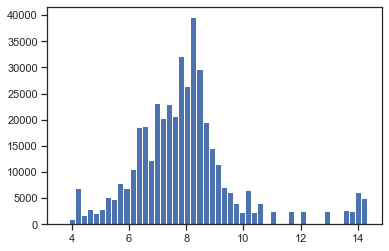

In [73]:
plt.hist(data['Unemployment'], 50)
plt.show()

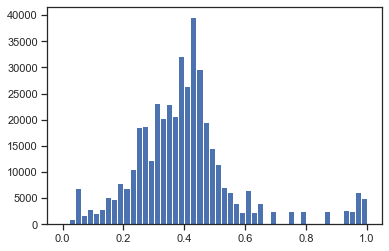

In [74]:
plt.hist(sc1_data, 50)
plt.show()

Таким образом получили значения от 0 до 1.

## Масштабирование данных на основе [Z-оценки](https://ru.wikipedia.org/wiki/Z-%D0%BE%D1%86%D0%B5%D0%BD%D0%BA%D0%B0) - [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)

In [75]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['Unemployment']])

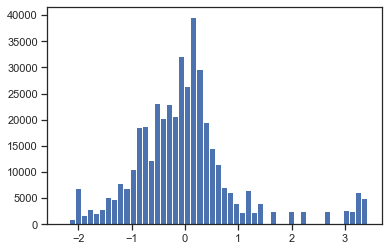

In [77]:
plt.hist(sc2_data, 50)
plt.show()

Таким образом получили значения от -2 до 3.